In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Load Dataset

In [2]:
df = pd.read_csv('../../data/benin-malanville.csv')
assert not df.empty, "Data import failed - DataFrame is empty!"


In [5]:
# First 5 rows
print(df.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


### Summary Statistics & Missing-Value Report

In [4]:
print("The description of the numeric columns:")
summary_stats = df.describe()
print(summary_stats)
# Overview of categorical columns
print("---------------------------------")
print("The description of the categorical columns:")
print(df.describe(include=['object']))
# Overview of all columns
print("---------------------------------")
print("The description of all columns:")
print(df.describe(include='all'))
# Overview of the dataset
print("----------------------------------")
print("An overview of the dataset: the last 5 rows")
print(df.tail())
# Overview of the dataset
print("----------------------------------")
print("An overview of the dataset: a random sample of 5 rows")
print(df.sample(5))
# Overview of the dataset
print("----------------------------------")
print("An overview of the dataset: the shape of the dataset")
print(df.info())

# Total missing values per column
missing_values = df.isna().sum()
print("Missing values per column:")
print(missing_values)

# Flag columns with >5% nulls
total_rows = len(df)
high_null_cols = missing_values[missing_values > 0.05 * total_rows]
print("\nColumns with >5% nulls:")
print(high_null_cols)

The description of the numeric columns:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000

### Outlier Detection & Basic Cleaning

In [5]:
# Columns to check for outliers
sensor_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores and flag outliers
for col in sensor_cols:
    if col in df.columns:
        df[f'{col}_zscore'] = np.abs(stats.zscore(df[col]))
        df[f'{col}_outlier'] = df[f'{col}_zscore'] > 3

# Show outlier counts
print("Outlier counts per column:")
print(df[[f'{col}_outlier' for col in sensor_cols if f'{col}_outlier' in df]].sum())

Outlier counts per column:
GHI_outlier         89
DNI_outlier          0
DHI_outlier       3738
ModA_outlier        27
ModB_outlier        63
WS_outlier        3109
WSgust_outlier    3500
dtype: int64


Handle Missing values

In [6]:
for col in sensor_cols:
    if col in df.columns:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

# Drop rows with missing timestamps
df = df.dropna(subset=['Timestamp'])

print("\nMissing values after cleaning:")
print(df[sensor_cols].isna().sum())


Missing values after cleaning:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


 Remove or Correct Outliers

In [7]:
# Option 1: Replace outliers with median
for col in sensor_cols:
    if col in df.columns:
        median_val = df[col].median()
        df.loc[df[f'{col}_outlier'], col] = median_val

# Option 2: Drop outlier rows (uncomment to use)
# df = df[~df[[f'{col}_outlier' for col in sensor_cols]].any(axis=1)]

# Drop Z-score columns (no longer needed)
df = df.drop(columns=[f'{col}_zscore' for col in sensor_cols if f'{col}_zscore' in df])
df = df.drop(columns=[f'{col}_outlier' for col in sensor_cols if f'{col}_outlier' in df])

Export Cleaned Data

In [8]:
import os

# Create data/ directory if it doesn't exist
os.makedirs('../../data/', exist_ok=True)

# Export (e.g., for Benin-Malanville)
output_path = '../../data/benin-malanville_clean.csv'
df.to_csv(output_path, index=False)

print(f"\nCleaned data saved to {output_path}")


Cleaned data saved to ../../data/benin-malanville_clean.csv


### Time Series Analysis


Daily Patterns

C:\Users\hp\AppData\Local\Temp\ipykernel_13124\825168686.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('H').mean()


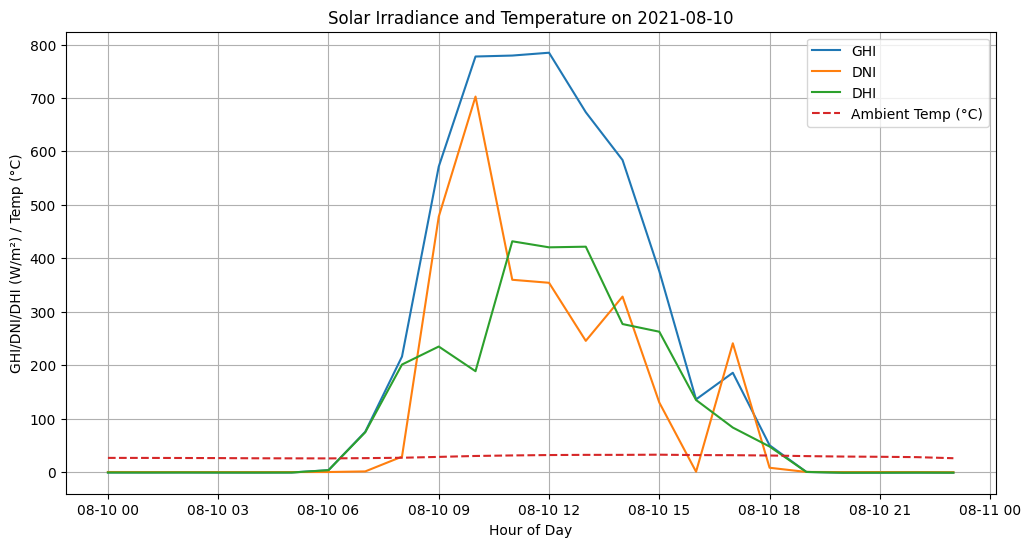

In [9]:
# Convert 'Timestamp' to datetime and set as index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')

# Resample to hourly averages (reduce noise for clearer trends)
df_hourly = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('H').mean()

# Extract a single day (e.g., 2021-08-10)
single_day = df_hourly.loc['2021-08-10']

plt.figure(figsize=(12, 6))
plt.plot(single_day.index, single_day['GHI'], label='GHI')
plt.plot(single_day.index, single_day['DNI'], label='DNI')
plt.plot(single_day.index, single_day['DHI'], label='DHI')
plt.plot(single_day.index, single_day['Tamb'], label='Ambient Temp (°C)', linestyle='--')

plt.title('Solar Irradiance and Temperature on 2021-08-10')
plt.xlabel('Hour of Day')
plt.ylabel('GHI/DNI/DHI (W/m²) / Temp (°C)')
plt.legend()
plt.grid()
plt.show()

Monthly Trends

<Figure size 1200x600 with 0 Axes>

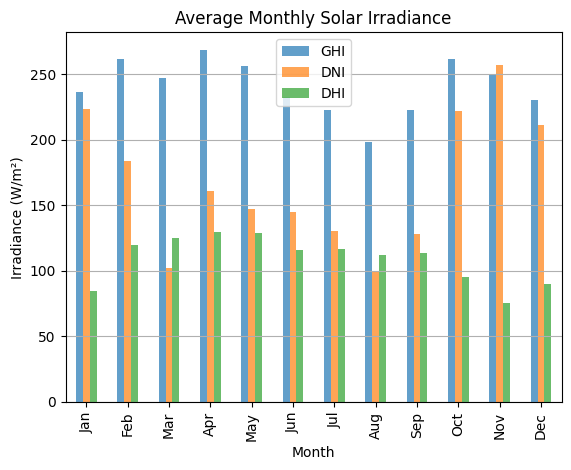

In [31]:
# Get actual months present in the data
months_in_data = df_hourly.index.month.unique()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Filter month names to only those present
used_month_names = [month_names[i-1] for i in sorted(months_in_data)]

# Plot with correct labels
plt.figure(figsize=(12, 6))
monthly[['GHI', 'DNI', 'DHI']].plot(kind='bar', alpha=0.7)
plt.title('Average Monthly Solar Irradiance')
plt.xlabel('Month')
plt.ylabel('Irradiance (W/m²)')
plt.xticks(ticks=range(len(months_in_data)), labels=used_month_names)  # Dynamic labels
plt.grid(axis='y')
plt.show()

Anomaly Detection (Rolling Averages)

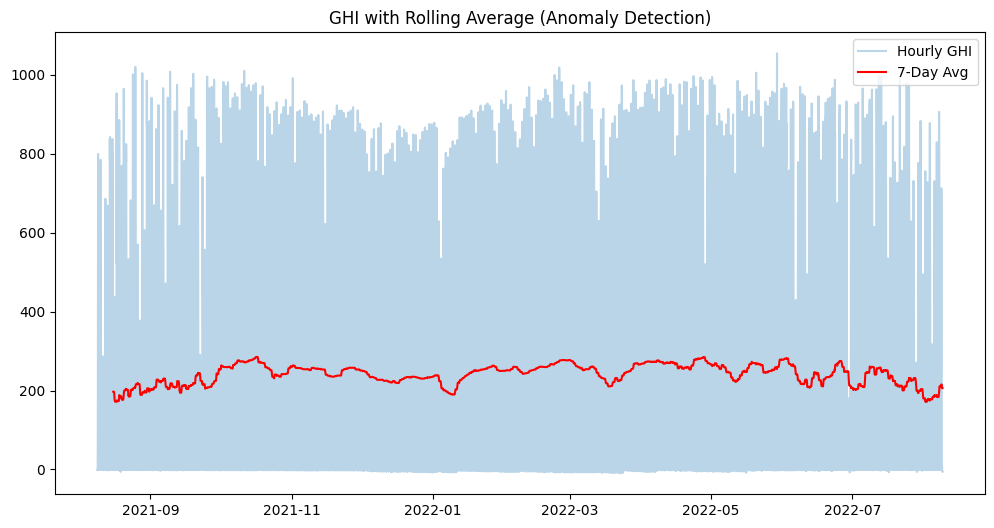

In [32]:
# 7-day rolling average for GHI
df_hourly['GHI_7day_avg'] = df_hourly['GHI'].rolling(window=7*24).mean()

# Plot anomalies (e.g., dips due to dust storms)
plt.figure(figsize=(12, 6))
plt.plot(df_hourly.index, df_hourly['GHI'], label='Hourly GHI', alpha=0.3)
plt.plot(df_hourly.index, df_hourly['GHI_7day_avg'], label='7-Day Avg', color='red')
plt.title('GHI with Rolling Average (Anomaly Detection)')
plt.legend()
plt.show()